In [30]:
%reload_ext autoreload
%autoreload 2

In [31]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) ## view all the columns

In [32]:
from dotenv import load_dotenv
import os
import sys
sys.path.insert(0,'../../src/')
from utlis import Utils as ul
from lib import Lib as lp

sys.path.insert(0,'../../database/')
from db_connection import DBConnect as dbconnect
# Load environment variables from .env file
load_dotenv()

True

In [33]:
# Create a connection to the PostgreSQL database
engine = dbconnect.connect_to_db()
# Query to retrieve all rows from the xdr_data
query = "SELECT * FROM clean_data"
# Execute the query and load the result into a Pandas DataFrame
df = pd.read_sql(query, engine)
engine.dispose()
# Display the DataFrame
df

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),UL TP < 10 Kbps (%),10 Kbps < UL TP < 50 Kbps (%),50 Kbps < UL TP < 300 Kbps (%),UL TP > 300 Kbps (%),HTTP DL (Bytes),HTTP UL (Bytes),Activity Duration DL (ms),Activity Duration UL (ms),Dur. (ms).1,Handset Manufacturer,Handset Type,Nb of sec with 125000B < Vol DL,Nb of sec with 1250B < Vol UL < 6250B,Nb of sec with 31250B < Vol DL < 125000B,Nb of sec with 37500B < Vol UL,Nb of sec with 6250B < Vol DL < 31250B,Nb of sec with 6250B < Vol UL < 37500B,Nb of sec with Vol DL < 6250B,Nb of sec with Vol UL < 1250B,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,42.0,5.0,23.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,230583.0,25427.0,37624.0,38787.0,1.823653e+09,Samsung,Samsung Galaxy A5 Sm-A520F,485.0,3.0,1.0,24.0,2.0,4.0,213.0,214.0,1.545765e+06,24420.00000,1.634479e+06,1.271433e+06,3.563542e+06,137762.00000,1.585461e+07,2.501332e+06,8.198936e+06,9.656251e+06,2.780823e+08,1.434415e+07,1.717444e+08,8.814393e+06,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,65.0,5.0,16.0,26.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,230583.0,25427.0,168.0,3560.0,1.365104e+09,Samsung,Samsung Galaxy J5 (Sm-J530),485.0,3.0,1.0,24.0,2.0,4.0,971.0,1022.0,1.926113e+06,7165.00000,3.493924e+06,9.201720e+05,6.290460e+05,308339.00000,2.024740e+07,1.911173e+07,1.833841e+07,1.722713e+07,6.087501e+08,1.170709e+06,5.269042e+08,1.505514e+07,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,230583.0,25427.0,0.0,0.0,1.361763e+09,Samsung,Samsung Galaxy A8 (2018),485.0,3.0,1.0,24.0,2.0,4.0,751.0,695.0,1.684053e+06,42224.00000,8.535055e+06,1.694064e+06,2.690151e+06,672973.00000,1.972566e+07,1.469958e+07,1.758779e+07,6.163408e+06,2.295846e+08,3.956300e+05,4.106926e+08,4.215763e+06,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,65.0,5.0,44.0,44.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,230583.0,25427.0,3330.0,37882.0,1.321510e+09,undefined,undefined,485.0,3.0,1.0,24.0,2.0,4.0,17.0,207.0,6.441210e+05,13372.00000,9.023734e+06,2.788027e+06,1.439754e+06,631229.00000,2.138812e+07,1.514664e+07,1.399465e+07,1.097942e+06,7.995382e+08,1.084972e+07,7.490399e+08,1.279728e+07,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,65.0,5.0,6.0,9.0,19520.0,7230.0,100.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,230583.0,25427.0,0.0,0.0,1.089009e+09,Samsung,Samsung Sm-G390F,485.0,3.0,1.0,24.0,2.0,4.0,607.0,604.0,8.626000e+05,50188.00000,6.248284e+06,1.500559e+06,1.936496e+06,173853.00000,1.525938e+07,1.896287e+07,1.712458e+07,4.152180e+05,5.277072e+08,3.529801e+06,5.507095e+08,1.391032e+07,38542814.0,569138589.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149996,7.277826e+18,4/29/2019 7:28,451.0,4/30/2019 6:02,214.0,81230.0,2.082022e+14,3.365069e+10,3.548311e+13,D20434A,32.0,0.0,52.0,65.0

## For the actual telecom dataset, you‘re expected to conduct a full User Overview analysis & the following sub-tasks are your guidance: 
- [X] Start by identifying the top 10 handsets used by the customers.
- [X] Then, identify the top 3 handset manufacturers
- [X] Next, identify the top 5 handsets per top 3 handset manufacturer
- [X] Make a short interpretation and recommendation to marketing teams

In [34]:
# top 10 headsets used by the customer
top_10_handset_by_customers= df['Handset Type'].value_counts()[:10]
top_10_handset_by_customers

Huawei B528S-23A                19792
Apple iPhone 6S (A1688)          9452
Apple iPhone 6 (A1586)           9059
undefined                        9018
Apple iPhone 7 (A1778)           6361
Apple iPhone Se (A1723)          5211
Apple iPhone 8 (A1905)           5028
Apple iPhone Xr (A2105)          4588
Samsung Galaxy S8 (Sm-G950F)     4539
Apple iPhone X (A1901)           3825
Name: Handset Type, dtype: int64

<Axes: title={'center': 'Top 10 headsets used by the customers '}, xlabel='Brand Model', ylabel='Unit Solds'>

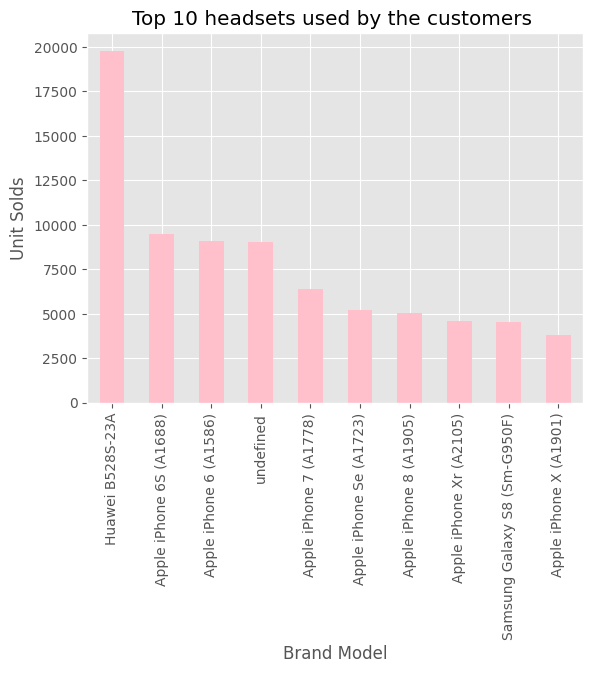

In [35]:
top_10_handset_by_customers.plot(kind='bar', title="Top 10 headsets used by the customers ", xlabel='Brand Model', ylabel='Unit Solds',color='pink')

In [36]:
# identify the top 3 headset manufactures 
top_3_handset_by_manufactures = df['Handset Manufacturer'].value_counts()[:3]
top_3_handset_by_manufactures
# so totall of users that use those brands will be 59565+40839+34423 = 134827

Apple      59827
Samsung    40979
Huawei     34529
Name: Handset Manufacturer, dtype: int64

<Axes: title={'center': 'Top 3 headset manufactures'}, xlabel='Brand Name', ylabel='Unit Sold'>

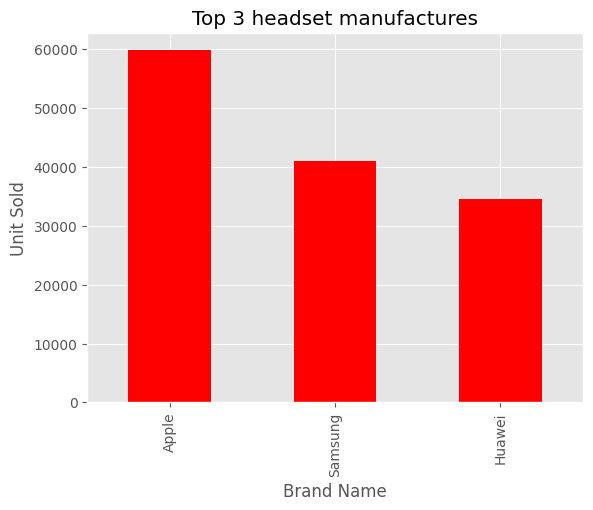

In [37]:
top_3_handset_by_manufactures.plot(kind='bar', title="Top 3 headset manufactures", xlabel='Brand Name', ylabel='Unit Sold',color='Red')

In [38]:
# identify the top 5 handsets per top 3 handset manufacturer
# manufactor one : Apple 
apple_handset=lp.get_top_3_manufacturer_handsets(df,'Apple')
apple_handset

count
Handset Manufacturer Handset Type                  
Apple                Apple iPhone 6S (A1688)   9452
                     Apple iPhone 6 (A1586)    9059
                     Apple iPhone 7 (A1778)    6361
                     Apple iPhone Se (A1723)   5211
                     Apple iPhone 8 (A1905)    5028

<Axes: title={'center': 'identify the top 5 handset for Appel'}, xlabel='Phone Model', ylabel='Unit Sold'>

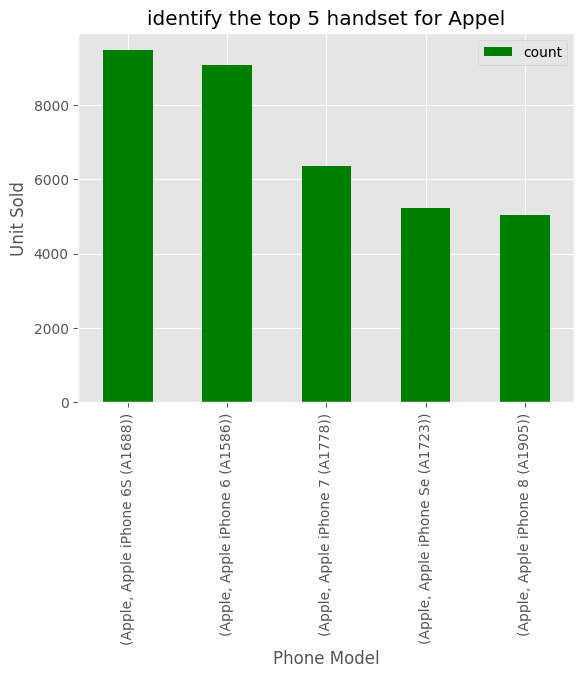

In [39]:
apple_handset.plot(kind='bar', title="identify the top 5 handset for Appel", xlabel='Phone Model', ylabel='Unit Sold',color='green')

In [40]:
# identify the top 5 handsets per top 3 handset manufacturer
# manufactor one : Samsung 
samsung_handset=lp.get_top_3_manufacturer_handsets(df,'Samsung')
samsung_handset

count
Handset Manufacturer Handset Type                       
Samsung              Samsung Galaxy S8 (Sm-G950F)   4539
                     Samsung Galaxy A5 Sm-A520F     3737
                     Samsung Galaxy J5 (Sm-J530)    3705
                     Samsung Galaxy J3 (Sm-J330)    3493
                     Samsung Galaxy S7 (Sm-G930X)   3211

<Axes: title={'center': 'identify the top 5 handset for samsung'}, xlabel='Phone Model', ylabel='Unit Sold'>

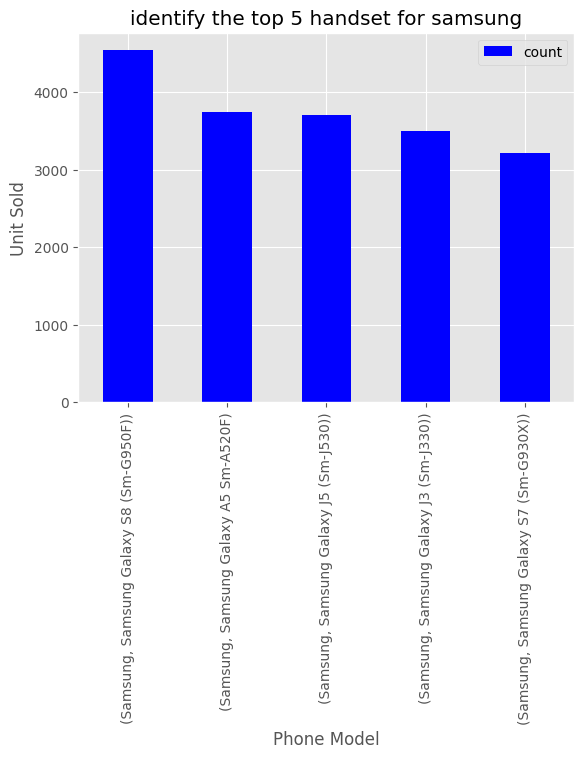

In [41]:
samsung_handset.plot(kind='bar', title="identify the top 5 handset for samsung", xlabel='Phone Model', ylabel='Unit Sold',color='blue')

In [42]:
# identify the top 5 handsets per top 3 handset manufacturer
# manufactor one : Huawei 
huawei_handset = lp.get_top_3_manufacturer_handsets(df,'Huawei')
huawei_handset

count
Handset Manufacturer Handset Type                         
Huawei               Huawei B528S-23A                19792
                     Huawei E5180                     2084
                     Huawei P20 Lite Huawei Nova 3E   2032
                     Huawei P20                       1481
                     Huawei Y6 2018                   1003

<Axes: title={'center': 'identify the top 5 handset for huawei'}, xlabel='Phone Model', ylabel='Unit Sold'>

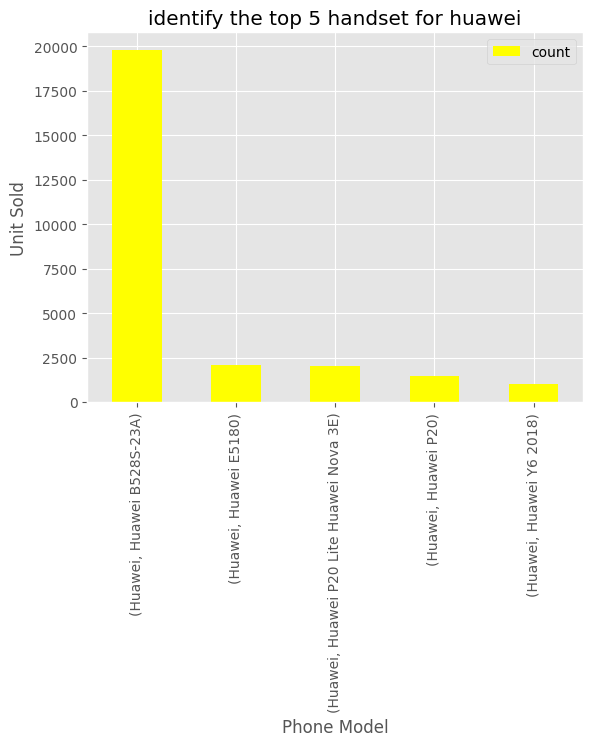

In [43]:
huawei_handset.plot(kind='bar', title="identify the top 5 handset for huawei", xlabel='Phone Model', ylabel='Unit Sold',color='yellow')

### Strategic Marketing Insights and Recommendations for Top Smartphone Models

The smartphones manufactured by Apple, Samsung, and Huawei are the most popular among the network's **134,827 users**. The Huawei **B528S-23A** is the most popular device, with **19,752 units** sold. Notably, the Apple iPhone **6S, 6, 7, and SE** take the next four spots in user preferences after Huawei.
For improved market positioning, I would recommend focusing on promoting **Huawei B528S-23A** and its counterparts, as well as strategically targeting **iPhone 6S, 6, 7, and SE**.

## Aggregate per user the following information in the column  
- [X] number of xDR sessions
- [X] Session duration
- [X] the total download (DL) and upload (UL) data
- [X] the total data volume (in Bytes) during this session for each application

In [15]:
# drop the duplicate values 
data = ul.drop_duplicates_and_count(df)

Original DataFrame:
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  


DataFrame after dropping duplicates:
           Bearer Id            Start  Start ms              End  End ms  \
0       1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1       1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2       1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3       1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4       1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   
...              ...              ...       ...              ...     ...   
149996  7.277826e+18   4/29/2019 7:28     451.0   4/30/2019 6:02   214.0   
149997  7.349883e+18   4/29/2019 7:28     483.0  4/30/2019 10:41   187.0   
149998  1.311448e+19   4/29/2019 7:28     283.0  4/30/2019 10:46   810.0   
149999  1.311448e+19   4/29/2019 7:28     696.0  4/30/2019 10:40   327.0   
150000           NaN             None       NaN             None     NaN   

        Dur. (ms)          IMSI  MSISDN/Number   

In [16]:
# view percentage of missing value data without the duplicate values
ul.view_percentage_of_missing_value(data)

Percentage of missing value 


Bearer Id                                    0.660662
Start                                        0.000667
Start ms                                     0.000667
End                                          0.000667
End ms                                       0.000667
Dur. (ms)                                    0.000667
IMSI                                         0.379997
MSISDN/Number                                0.710662
IMEI                                         0.381331
Last Location Name                           0.768662
Avg RTT DL (ms)                             18.552543
Avg RTT UL (ms)                             18.541210
Avg Bearer TP DL (kbps)                      0.000667
Avg Bearer TP UL (kbps)                      0.000667
TCP DL Retrans. Vol (Bytes)                 58.763608
TCP UL Retrans. Vol (Bytes)                 64.432237
DL TP < 50 Kbps (%)                          0.502663
50 Kbps < DL TP < 250 Kbps (%)               0.502663
250 Kbps < DL TP < 1 Mbps (%

In [17]:
# fill the missing values
new_data = data.ffill().bfill() # fill the missing data both in forward and backward to make sure they are filled
ul.view_percentage_of_missing_value(new_data)

Percentage of missing value 


Bearer Id                                   0.0
Start                                       0.0
Start ms                                    0.0
End                                         0.0
End ms                                      0.0
Dur. (ms)                                   0.0
IMSI                                        0.0
MSISDN/Number                               0.0
IMEI                                        0.0
Last Location Name                          0.0
Avg RTT DL (ms)                             0.0
Avg RTT UL (ms)                             0.0
Avg Bearer TP DL (kbps)                     0.0
Avg Bearer TP UL (kbps)                     0.0
TCP DL Retrans. Vol (Bytes)                 0.0
TCP UL Retrans. Vol (Bytes)                 0.0
DL TP < 50 Kbps (%)                         0.0
50 Kbps < DL TP < 250 Kbps (%)              0.0
250 Kbps < DL TP < 1 Mbps (%)               0.0
DL TP > 1 Mbps (%)                          0.0
UL TP < 10 Kbps (%)                     

In [22]:
# save data to postgers table
new_data.to_sql("clean_data", con=engine, if_exists="replace", index=False)

1

#### Aggreated

In [24]:
# Group by 'MSISDN/Number' and count 'Bearer Id' for the number of xDR sessions
session_count_df = new_data.groupby('MSISDN/Number')['Bearer Id'].count().reset_index()
session_count_df.columns = ['MSISDN/Number', 'num of xDR sessions']

# Group by 'MSISDN/Number' and sum 'Dur. (ms)' for the total session duration
total_duration_df = new_data.groupby('MSISDN/Number')['Dur. (ms)'].sum().reset_index(name='Total_Session_Duration_ms')

# Group by 'MSISDN/Number' and sum 'Total DL (Bytes)', 'Total UL (Bytes)' for total data usage
total_usage = new_data.groupby('MSISDN/Number')[['Total DL (Bytes)', 'Total UL (Bytes)']].sum().reset_index()

# application session usage 
app_session_usage = new_data.groupby(['MSISDN/Number'])[
    ['Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)']
].sum().reset_index()

# Merge the DataFrames on 'MSISDN/Number'
new_df = pd.merge(session_count_df, total_duration_df, on='MSISDN/Number')
new_df = pd.merge(new_df, app_session_usage, on='MSISDN/Number')
new_df = pd.merge(new_df, total_usage, on='MSISDN/Number')

In [25]:
new_df.head()

,MSISDN/Number,num of xDR sessions,Total_Session_Duration_ms,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
0,3.360100e+10,1,116720.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,377096990.0,9473882.0,8.426375e+08,36053108.0
1,3.360100e+10,1,181230.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,279557701.0,2152370.0,1.207552e+08,36104459.0
2,3.360100e+10,1,134969.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,495086501.0,6607171.0,5.566597e+08,39306820.0
3,3.360101e+10,1,49878.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,25248001.0,10031701.0,4.019932e+08,20327526.0
4,3.360101e+10,2,37104.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,777643713.0,27160771.0,1.363130e+09,94280527.0


In [26]:
# save data to postgers table
new_df.to_sql("aggrated_data", con=engine, if_exists="replace", index=False)

856

In [29]:
# view data from postgers table
view_data = pd.read_sql_table("aggrated_data", con=engine)
view_data.head(10)

,MSISDN/Number,num of xDR sessions,Total_Session_Duration_ms,Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
0,3.360100e+10,1,116720.0,2206504.0,25631.0,3337123.0,1051882.0,837400.0,493962.0,14900201.0,6724347.0,10265105.0,16915876.0,8.110911e+08,1367528.0,3.770970e+08,9473882.0,8.426375e+08,36053108.0
1,3.360100e+10,1,181230.0,2598548.0,62017.0,4197697.0,1137166.0,2828821.0,478960.0,5324251.0,7107972.0,770569.0,10451194.0,1.050353e+08,14714780.0,2.795577e+08,2152370.0,1.207552e+08,36104459.0
2,3.360100e+10,1,134969.0,3148004.0,47619.0,3343483.0,99643.0,2436500.0,768880.0,2137272.0,19196298.0,16525919.0,2827981.0,5.290685e+08,9759228.0,4.950865e+08,6607171.0,5.566597e+08,39306820.0
3,3.360101e+10,1,49878.0,251469.0,28825.0,5937765.0,3740728.0,2178618.0,106052.0,4393123.0,2584198.0,1157362.0,784730.0,3.880748e+08,3051292.0,2.524800e+07,10031701.0,4.019932e+08,20327526.0
4,3.360101e+10,2,37104.0,2861230.0,51312.0,13728668.0,4770948.0,2247808.0,1057661.0,10339971.0,31193031.0,24971647.0,24230077.0,1.308981e+09,5816727.0,7.776437e+08,27160771.0,1.363130e+09,94280527.0
5,3.360101e+10,2,253983.0,3787122.0,5790.0,11993496.0,3269638.0,6513834.0,1334762.0,12169742.0,22177380.0,14569029.0,15746472.0,5.061747e+08,5461038.0,4.803586e+08,12014169.0,5.552080e+08,60009249.0
6,3.360101e+10,2,128360.0,2707339.0,62288.0,4346088.0,5850315.0,736446.0,622513.0,2990819.0,23440516.0,12813052.0,32999345.0,5.294475e+08,19013593.0,2.051954e+08,19693288.0,5.530412e+08,101681858.0
7,3.360101e+10,1,86399.0,1740000.0,42692.0,11036391.0,987223.0,1280558.0,935005.0,5100103.0,13792637.0,1392985.0,13899855.0,2.735350e+08,8829356.0,1.781130e+08,88511.0,2.940851e+08,38575279.0
8,3.360101e+10,2,495702.0,5206619.0,82066.0,11046222.0,3087989.0,3666031.0,933794.0,41189830.0,22253972.0,27418209.0,26797908.0,8.080333e+08,25054690.0,1.026521e+09,15361597.0,8.965602e+08,93572016.0
9,3.360102e+10,1,124854.0,938582.0,18193.0,11098762.0,1836407.0,1986925.0,796355.0,13624376.0,14945336.0,22460852.0,13064219.0,6.352633e+08,11832418.0,1.337412e+08,4598080.0,6.853728e+08,47091008.0
